In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.preprocessing.image
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import os;
import datetime  
import cv2 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
%matplotlib inline

import sys
sys.path.insert(0,os.path.dirname(os.getcwd()))

C:\Users\takchoi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [90]:
from dataprocessing.utils import *
import config.mnist as MNIST
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
data_df = pd.read_csv('../data/MNIST/train.csv')
test_df = pd.read_csv('../data/MNIST/test.csv')

# 2. Analyze data <a class="anchor" id="2-bullet"></a> 
- load images and have a first look
- normalize images

x_train_valid.shape =  (42000, 28, 28, 1)
y_train_valid_labels.shape =  (42000,)
image_size =  784
image_width =  28
image_height =  28
labels_count =  10


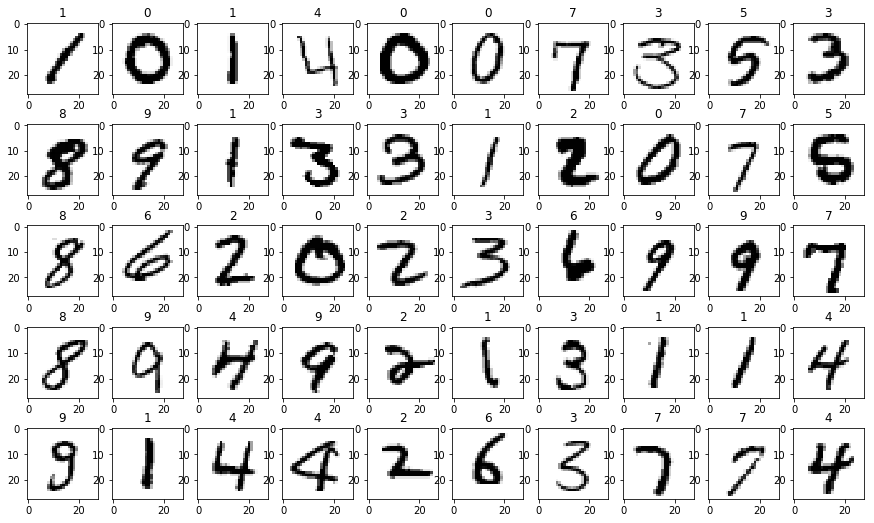

In [87]:
## normalize data and split into training and validation sets

# extract and normalize images
x_train_valid = data_df.iloc[:,1:].values.reshape(-1,28,28,1) # (42000,28,28,1) array
x_train_valid = x_train_valid.astype(np.float) # convert from int64 to float32
x_train_valid = normalize_data(x_train_valid)
image_width = image_height = 28
image_size = 784

# extract image labels
y_train_valid_labels = data_df.iloc[:,0].values # (42000,1) array
labels_count = np.unique(y_train_valid_labels).shape[0]; # number of different labels = 10

#plot some images and labels
plt.figure(figsize=(15,9))
for i in range(50):
    plt.subplot(5,10,1+i)
    plt.title(y_train_valid_labels[i])
    plt.imshow(x_train_valid[i].reshape(28,28), cmap=cm.binary)
    
# labels in one hot representation
y_train_valid = dense_to_one_hot(y_train_valid_labels, labels_count).astype(np.uint8)

# dictionaries for saving results
y_valid_pred = {}
y_train_pred = {}
y_test_pred = {}
train_loss, valid_loss = {}, {}
train_acc, valid_acc = {}, {}

print('x_train_valid.shape = ', x_train_valid.shape)
print('y_train_valid_labels.shape = ', y_train_valid_labels.shape)
print('image_size = ', image_size )
print('image_width = ', image_width)
print('image_height = ', image_height)
print('labels_count = ', labels_count)


# 3. Manipulate data <a class="anchor" id="3-bullet"></a> 
- generate new images via rotations, translations and zooming

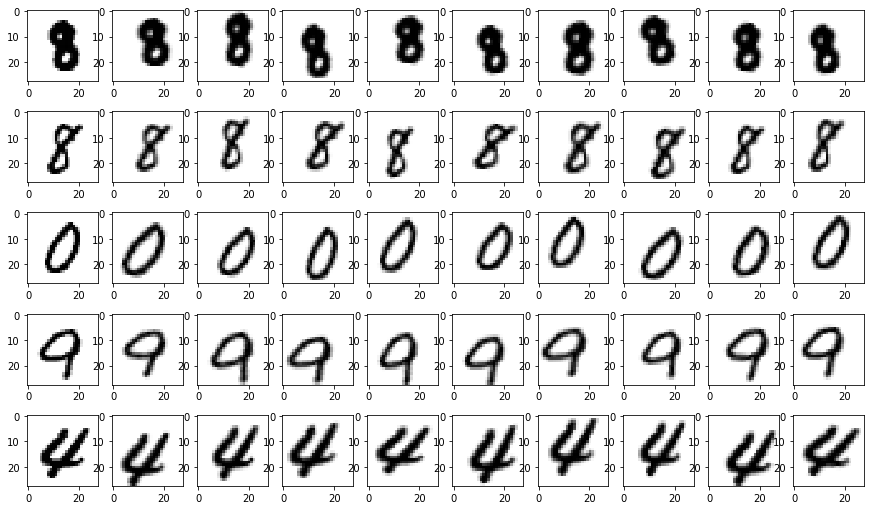

In [66]:
# check image generation
fig,axs = plt.subplots(5,10, figsize=(15,9))
for i in range(5):
    n = np.random.randint(0,x_train_valid.shape[0]-2)
    axs[i,0].imshow(x_train_valid[n:n+1].reshape(28,28),cmap=cm.binary)
    axs[i,1].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,2].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,3].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,4].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,5].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,6].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,7].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,8].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,9].imshow(generate_images(x_train_valid[n:n+1]).reshape(28,28), cmap=cm.binary)

# 4. Try out some basic models with sklearn <a class="anchor" id="4-bullet"></a> 

# 5. Build the neural network with tensorflow <a class="anchor" id="5-bullet"></a> 

# 6. Train and validate the neural network <a class="anchor" id="6-bullet"></a> 
- first try out some sklearn models
- train the neural network 
- visualize the losses, accuracies, the weights and the activations
- tune the hyperparameters


In [67]:
# cross validations
cv_num = 5 # cross validations default = 20 => 5% validation set
kfold = sklearn.model_selection.KFold(cv_num, shuffle=True, random_state=123)

In [98]:
%autoreload 2
for i,(train_index, valid_index) in enumerate(kfold.split(x_train_valid)):
    
    # start timer
    start = datetime.datetime.now();
    
    # train and validation data of original images
    x_train = x_train_valid[train_index]
    y_train = y_train_valid[train_index]
    x_valid = x_train_valid[valid_index]
    y_valid = y_train_valid[valid_index]
    
    # create neural network graph
    mnist = MNIST.mnist()    
    mnist.create_graph() # create graph
    mnist.attach_saver() # attach saver tensors
    
    # start tensorflow session
    with tf.Session() as sess:
        
        # attach summaries
        mnist.attach_summary(sess) 
        
        # variable initialization of the default graph
        sess.run(tf.global_variables_initializer()) 
    
        # training on original data
        mnist.train_graph(sess, x_train, y_train, x_valid, y_valid, n_epoch = 1.0)
        
        # training on augmented data
        #mnist.train_graph(sess, x_train, y_train, x_valid, y_valid, n_epoch = 14.0,
        #                    train_on_augmented_data = True)

        # save tensors and summaries of model
        mnist.save_model(sess)
        
    # only one iteration
    if True:
        break;
        
    
print('total running time for training: ', datetime.datetime.now() - start)
    

num_weights = 361188
num_biases = 684
24-05-2018 01:13:15 : start training
learnrate =  0.001 , n_epoch =  1.0 , mb_size =  50
0.00 epoch: train/val loss = 2.5525/2.5392, train/val acc = 0.0756/0.0796
0.20 epoch: train/val loss = 0.2564/0.2652, train/val acc = 0.9186/0.9181
0.40 epoch: train/val loss = 0.1322/0.1449, train/val acc = 0.9581/0.9556
0.60 epoch: train/val loss = 0.1042/0.1080, train/val acc = 0.9662/0.9660
0.80 epoch: train/val loss = 0.0879/0.0929, train/val acc = 0.9727/0.9708
1.00 epoch: train/val loss = 0.0801/0.0828, train/val acc = 0.9740/0.9743
1.00 epoch: train/val loss = 0.0786/0.0855, train/val acc = 0.9736/0.9739
running time for training:  0:05:13.787112
total running time for training:  0:05:15.602154


RuntimeError: Attempted to use a closed Session.

In [84]:
from layer.layers import *
%autoreload 2
conv2d?

In [78]:
tf.nn.relu(conv2d(1,2,name='3'),name='4')

TypeError: conv2d() missing 1 required positional argument: 'strides'

In [ ]:
## visualization with tensorboard

if False:
    !tensorboard --logdir=./logs

In [ ]:
## show confusion matrix

mn = nn_name[0]
mnist = MNIST.mnist()
sess = nn_graph.load_session_from_file(mnist.name)
y_valid_pred[mn] = nn_graph.forward(sess, x_valid)
sess.close()

cnf_matrix = sklearn.metrics.confusion_matrix(
    one_hot_to_dense(y_valid_pred[mn]), one_hot_to_dense(y_valid)).astype(np.float32)

labels_array = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fig, ax = plt.subplots(1,figsize=(10,10))
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
ax.set_xticklabels(labels_array)
ax.set_yticklabels(labels_array)
plt.title('Confusion matrix of validation set')
plt.ylabel('True digit')
plt.xlabel('Predicted digit')
plt.show();

In [ ]:
## loss and accuracy curves

mn = nn_name[0]
nn_graph = nn_class()
sess = nn_graph.load_session_from_file(mn)
train_loss[mn], valid_loss[mn] = nn_graph.get_loss(sess)
train_acc[mn], valid_acc[mn] = nn_graph.get_accuracy(sess)
sess.close()

print('final train/valid loss = %.4f/%.4f, train/valid accuracy = %.4f/%.4f'%(
    train_loss[mn][-1], valid_loss[mn][-1], train_acc[mn][-1], valid_acc[mn][-1]))

plt.figure(figsize=(10, 5));
plt.subplot(1,2,1);
plt.plot(np.arange(0,len(train_acc[mn])), train_acc[mn],'-b', label='Training')
plt.plot(np.arange(0,len(valid_acc[mn])), valid_acc[mn],'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
plt.ylim(ymax = 1.1, ymin = 0.0)
plt.ylabel('accuracy')
plt.xlabel('log steps');

plt.subplot(1,2,2)
plt.plot(np.arange(0,len(train_loss[mn])), train_loss[mn],'-b', label='Training')
plt.plot(np.arange(0,len(valid_loss[mn])), valid_loss[mn],'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
plt.ylim(ymax = 3.0, ymin = 0.0)
plt.ylabel('loss')
plt.xlabel('log steps');

In [ ]:
## visualize weights

mn = nn_name[0]
nn_graph = nn_class()
sess = nn_graph.load_session_from_file(mn)
W_conv1, W_conv2, W_conv3, _, _ = nn_graph.get_weights(sess)
sess.close()

print('W_conv1: min = ' + str(np.min(W_conv1)) + ' max = ' + str(np.max(W_conv1))
      + ' mean = ' + str(np.mean(W_conv1)) + ' std = ' + str(np.std(W_conv1)))
print('W_conv2: min = ' + str(np.min(W_conv2)) + ' max = ' + str(np.max(W_conv2))
      + ' mean = ' + str(np.mean(W_conv2)) + ' std = ' + str(np.std(W_conv2)))
print('W_conv3: min = ' + str(np.min(W_conv3)) + ' max = ' + str(np.max(W_conv3))
      + ' mean = ' + str(np.mean(W_conv3)) + ' std = ' + str(np.std(W_conv3)))

s_f_conv1 = nn_graph.s_f_conv1
s_f_conv2 = nn_graph.s_f_conv2
s_f_conv3 = nn_graph.s_f_conv3

W_conv1 = np.reshape(W_conv1,(s_f_conv1,s_f_conv1,1,6,6))
W_conv1 = np.transpose(W_conv1,(3,0,4,1,2))
W_conv1 = np.reshape(W_conv1,(s_f_conv1*6,s_f_conv1*6,1))

W_conv2 = np.reshape(W_conv2,(s_f_conv2,s_f_conv2,6,6,36))
W_conv2 = np.transpose(W_conv2,(2,0,3,1,4))
W_conv2 = np.reshape(W_conv2,(6*s_f_conv2,6*s_f_conv2,6,6))
W_conv2 = np.transpose(W_conv2,(2,0,3,1))
W_conv2 = np.reshape(W_conv2,(6*6*s_f_conv2,6*6*s_f_conv2))

W_conv3 = np.reshape(W_conv3,(s_f_conv3,s_f_conv3,6,6,36))
W_conv3 = np.transpose(W_conv3,(2,0,3,1,4))
W_conv3 = np.reshape(W_conv3,(6*s_f_conv3,6*s_f_conv3,6,6))
W_conv3 = np.transpose(W_conv3,(2,0,3,1))
W_conv3 = np.reshape(W_conv3,(6*6*s_f_conv3,6*6*s_f_conv3))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.gca().set_xticks(np.arange(-0.5, s_f_conv1*6, s_f_conv1), minor = False);
plt.gca().set_yticks(np.arange(-0.5, s_f_conv1*6, s_f_conv1), minor = False);
plt.grid(which = 'minor', color='b', linestyle='-', linewidth=1)
plt.title('W_conv1 ' + str(W_conv1.shape))
plt.colorbar(plt.imshow(W_conv1[:,:,0], cmap=cm.binary));

plt.subplot(1,3,2)
plt.gca().set_xticks(np.arange(-0.5, 6*6*s_f_conv2, 6*s_f_conv2), minor = False);
plt.gca().set_yticks(np.arange(-0.5, 6*6*s_f_conv2, 6*s_f_conv2), minor = False);
plt.grid(which = 'minor', color='b', linestyle='-', linewidth=1)
plt.title('W_conv2 ' + str(W_conv2.shape))
plt.colorbar(plt.imshow(W_conv2[:,:], cmap=cm.binary));

plt.subplot(1,3,3)
plt.gca().set_xticks(np.arange(-0.5, 6*6*s_f_conv3, 6*s_f_conv3), minor = False);
plt.gca().set_yticks(np.arange(-0.5, 6*6*s_f_conv3, 6*s_f_conv3), minor = False);
plt.grid(which = 'minor', color='b', linestyle='-', linewidth=1)
plt.title('W_conv3 ' + str(W_conv3.shape))
plt.colorbar(plt.imshow(W_conv3[:,:], cmap=cm.binary));


In [ ]:
## visualize activations

img_no = 10;
mn = nn_name[0]
nn_graph = nn_class()
sess = nn_graph.load_session_from_file(mn)
(h_conv1, h_pool1, h_conv2, h_pool2,h_conv3, h_pool3, h_fc1,
 h_fc2) = nn_graph.get_activations(sess, x_train_valid[img_no:img_no+1])
sess.close()
    
# original image
plt.figure(figsize=(15,9))
plt.subplot(2,4,1)
plt.imshow(x_train_valid[img_no].reshape(28,28),cmap=cm.binary);

# 1. convolution
plt.subplot(2,4,2)
plt.title('h_conv1 ' + str(h_conv1.shape))
h_conv1 = np.reshape(h_conv1,(-1,28,28,6,6))
h_conv1 = np.transpose(h_conv1,(0,3,1,4,2))
h_conv1 = np.reshape(h_conv1,(-1,6*28,6*28))
plt.imshow(h_conv1[0], cmap=cm.binary);

# 1. max pooling
plt.subplot(2,4,3)
plt.title('h_pool1 ' + str(h_pool1.shape))
h_pool1 = np.reshape(h_pool1,(-1,14,14,6,6))
h_pool1 = np.transpose(h_pool1,(0,3,1,4,2))
h_pool1 = np.reshape(h_pool1,(-1,6*14,6*14))
plt.imshow(h_pool1[0], cmap=cm.binary);

# 2. convolution
plt.subplot(2,4,4)
plt.title('h_conv2 ' + str(h_conv2.shape))
h_conv2 = np.reshape(h_conv2,(-1,14,14,6,6))
h_conv2 = np.transpose(h_conv2,(0,3,1,4,2))
h_conv2 = np.reshape(h_conv2,(-1,6*14,6*14))
plt.imshow(h_conv2[0], cmap=cm.binary);

# 2. max pooling
plt.subplot(2,4,5)
plt.title('h_pool2 ' + str(h_pool2.shape))
h_pool2 = np.reshape(h_pool2,(-1,7,7,6,6))
h_pool2 = np.transpose(h_pool2,(0,3,1,4,2))
h_pool2 = np.reshape(h_pool2,(-1,6*7,6*7))
plt.imshow(h_pool2[0], cmap=cm.binary);

# 3. convolution
plt.subplot(2,4,6)
plt.title('h_conv3 ' + str(h_conv3.shape))
h_conv3 = np.reshape(h_conv3,(-1,7,7,6,6))
h_conv3 = np.transpose(h_conv3,(0,3,1,4,2))
h_conv3 = np.reshape(h_conv3,(-1,6*7,6*7))
plt.imshow(h_conv3[0], cmap=cm.binary);

# 3. max pooling
plt.subplot(2,4,7)
plt.title('h_pool2 ' + str(h_pool3.shape))
h_pool3 = np.reshape(h_pool3,(-1,4,4,6,6))
h_pool3 = np.transpose(h_pool3,(0,3,1,4,2))
h_pool3 = np.reshape(h_pool3,(-1,6*4,6*4))
plt.imshow(h_pool3[0], cmap=cm.binary);

# 4. FC layer
plt.subplot(2,4,8)
plt.title('h_fc1 ' + str(h_fc1.shape))
h_fc1 = np.reshape(h_fc1,(-1,24,24))
plt.imshow(h_fc1[0], cmap=cm.binary);

# 5. FC layer
np.set_printoptions(precision=2)
print('h_fc2 = ', h_fc2)

In [ ]:
## show misclassified images

mn = nn_name[0]
nn_graph = nn_class()
sess = nn_graph.load_session_from_file(mn)
y_valid_pred[mn] = nn_graph.forward(sess, x_valid)
sess.close()

y_valid_pred_label = one_hot_to_dense(y_valid_pred[mn])
y_valid_label = one_hot_to_dense(y_valid)
y_val_false_index = []

for i in range(y_valid_label.shape[0]):
    if y_valid_pred_label[i] != y_valid_label[i]:
        y_val_false_index.append(i)

print('# false predictions: ', len(y_val_false_index),'out of', len(y_valid))

plt.figure(figsize=(10,15))
for j in range(0,5):
    for i in range(0,10):
        if j*10+i<len(y_val_false_index):
            plt.subplot(10,10,j*10+i+1)
            plt.title('%d/%d'%(y_valid_label[y_val_false_index[j*10+i]],
                               y_valid_pred_label[y_val_false_index[j*10+i]]))
            plt.imshow(x_valid[y_val_false_index[j*10+i]].reshape(28,28),cmap=cm.binary)    

# 7. Stacking of models and training a meta-model  <a class="anchor" id="7-bullet"></a> 

In [ ]:
## read test data

# read test data from CSV file 
if os.path.isfile('../input/test.csv'):
    test_df = pd.read_csv('../input/test.csv') # on kaggle 
    print('test.csv loaded: test_df{0}'.format(test_df.shape))
elif os.path.isfile('data/test.csv'):
    test_df = pd.read_csv('data/test.csv') # on local environment
    print('test.csv loaded: test_df{0}'.format(test_df.shape))
else:
    print('Error: test.csv not found')
    
# transforma and normalize test data
x_test = test_df.iloc[:,0:].values.reshape(-1,28,28,1) # (28000,28,28,1) array
x_test = x_test.astype(np.float)
x_test = normalize_data(x_test)
print('x_test.shape = ', x_test.shape)

# for saving results
y_test_pred = {}
y_test_pred_labels = {}

In [ ]:
## Stacking of neural networks

if False:
    
    take_models = ['nn0','nn1','nn2','nn3','nn4','nn5','nn6','nn7','nn8','nn9']

    # cross validations
    # choose the same seed as was done for training the neural nets
    kfold = sklearn.model_selection.KFold(len(take_models), shuffle=True, random_state = 123)

    # train and test data for meta model
    x_train_meta = np.array([]).reshape(-1,10)
    y_train_meta = np.array([]).reshape(-1,10)
    x_test_meta = np.zeros((x_test.shape[0], 10))

    print('Out-of-folds predictions:')

    # make out-of-folds predictions from base models
    for i,(train_index, valid_index) in enumerate(kfold.split(x_train_valid)):

        # training and validation data
        x_train = x_train_valid[train_index]
        y_train = y_train_valid[train_index]
        x_valid = x_train_valid[valid_index]
        y_valid = y_train_valid[valid_index]

        # load neural network and make predictions
        mn = take_models[i] 
        nn_graph = nn_class()
        sess = nn_graph.load_session_from_file(mn)
        y_train_pred[mn] = nn_graph.forward(sess, x_train[:len(x_valid)])
        y_valid_pred[mn] = nn_graph.forward(sess, x_valid)
        y_test_pred[mn] = nn_graph.forward(sess, x_test)
        sess.close()

        # create cloned model from base models
        #model = sklearn.base.clone(base_models[take_models[i]])
        #model.fit(x_train, y_train)
        #y_train_pred_proba['tmp'] = model.predict_proba(x_train)[:,1]
        #y_valid_pred_proba['tmp'] = model.predict_proba(x_valid)[:,1]
        #y_test_pred_proba['tmp'] = model.predict_proba(x_test)[:,1]

        # collect train and test data for meta model 
        x_train_meta = np.concatenate([x_train_meta, y_valid_pred[mn]])
        y_train_meta = np.concatenate([y_train_meta, y_valid]) 
        x_test_meta += y_test_pred[mn]

        print(take_models[i],': train/valid accuracy = %.4f/%.4f'%(
            accuracy_from_one_hot_labels(y_train_pred[mn], y_train[:len(x_valid)]),
            accuracy_from_one_hot_labels(y_valid_pred[mn], y_valid)))

        if False:
            break;

    # take average of test predictions
    x_test_meta = x_test_meta/(i+1)
    y_test_pred['stacked_models'] = x_test_meta

    print('')
    print('Stacked models: valid accuracy = %.4f'%accuracy_from_one_hot_labels(x_train_meta,
                                                                               y_train_meta))
     

In [ ]:
## use meta model

if False:
    
    logreg = sklearn.linear_model.LogisticRegression(verbose=0, solver='lbfgs',
                                                     multi_class='multinomial')
    
    # choose meta model
    take_meta_model = 'logreg'

    # train meta model
    model = sklearn.base.clone(base_models[take_meta_model]) 
    model.fit(x_train_meta, one_hot_to_dense(y_train_meta))
    
    y_train_pred['meta_model'] = model.predict_proba(x_train_meta)
    y_test_pred['meta_model'] = model.predict_proba(x_test_meta)

    print('Meta model: train accuracy = %.4f'%accuracy_from_one_hot_labels(x_train_meta, 
                                                           y_train_pred['meta_model']))

In [ ]:
## choose one single model for test prediction

if True:
    
    mn = nn_name[0] # choose saved model
    nn_graph = nn_class() # create instance
    sess = nn_graph.load_session_from_file(mn) # receive session 
    y_test_pred = {}
    y_test_pred_labels = {}

    # split evaluation of test predictions into batches
    kfold = sklearn.model_selection.KFold(40, shuffle=False) 
    for i,(train_index, valid_index) in enumerate(kfold.split(x_test)):
        if i==0:
            y_test_pred[mn] = nn_graph.forward(sess, x_test[valid_index])
        else: 
            y_test_pred[mn] = np.concatenate([y_test_pred[mn],
                                              nn_graph.forward(sess, x_test[valid_index])])

    sess.close()
    
    

# 8. Submit the test results <a class="anchor" id="8-bullet"></a> 

In [ ]:
# choose the test predictions and submit the results

#mn = 'meta_model'
mn = nn_name[0]
y_test_pred_labels[mn] = one_hot_to_dense(y_test_pred[mn])

print(mn+': y_test_pred_labels[mn].shape = ', y_test_pred_labels[mn].shape)
unique, counts = np.unique(y_test_pred_labels[mn], return_counts=True)
print(dict(zip(unique, counts)))

# save predictions
np.savetxt('submission.csv', 
           np.c_[range(1,len(x_test)+1), y_test_pred_labels[mn]], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

print('submission.csv completed')

In [ ]:
## look at some test images and predicted labels

plt.figure(figsize=(10,15))
for j in range(0,5):
    for i in range(0,10):
        plt.subplot(10,10,j*10+i+1)
        plt.title('%d'%y_test_pred_labels[mn][j*10+i])
        plt.imshow(x_test[j*10+i].reshape(28,28), cmap=cm.binary)


In [ ]:
import numpy as np


